In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

# Displacement threshold for immobile molecules
immobile_stepsize_threshold_nm = 30
# alpha component threshold for constrained diffusion
threshold_alpha = 0.7

label_1 = "Cy5 Dye\nN=30,704"
label_2 = "miRNA\nN=501,028"
label_3 = "mRNA\nN=79,202"
color_1 = "#FFA000"
color_2 = "#fc8d91"
color_3 = "#9a3324"
palette = [color_1, color_2, color_3]

postfix = "QD-three_in_condensate.png"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig4_regulation/Size_combined-Cy5_vs_miR_vs_mRNA"
fname_AIO_1 = "SPT_results_AIO_concat-20ms_Cy5_in_condensate.csv"
fname_AIO_2 = "SPT_results_AIO_concat-20ms_miR21_incondensate_5Reps.csv"
fname_AIO_3 = "SPT_results_AIO_concat-0Dex_noTR_0hr.csv"
fname_saspt_1 = "saSPT-pooled-mobile-20ms_Cy5_in_condensate.csv"
fname_saspt_2 = "saSPT-pooled-mobile-20ms_miR21_incondensate_5Reps.csv"
fname_saspt_3 = "saSPT-pooled-mobile-0Dex_noTR_0hr.csv"

## Combine dataframes

In [4]:
os.chdir(folder_save)

df1 = pd.read_csv(fname_AIO_1)
df2 = pd.read_csv(fname_AIO_2)
df3 = pd.read_csv(fname_AIO_3)
print(label_1, df1.shape[0])
print(label_2, df2.shape[0])
print(label_3, df3.shape[0])

Cy5 Dye
N=30,704 30704
miRNA$
N=501,028 501028
mRNA$
N=79,202 79202


In [6]:
df1.insert(0, "label", np.repeat(label_1, df1.shape[0]))
df2.insert(0, "label", np.repeat(label_2, df2.shape[0]))
df3.insert(0, "label", np.repeat(label_3, df3.shape[0]))

# Below sequence is important for the layer order
df_AIO = pd.concat([df1, df2, df3], ignore_index=True)

In [14]:
df1 = pd.read_csv(fname_saspt_1, dtype=float)
df2 = pd.read_csv(fname_saspt_2, dtype=float)
df3 = pd.read_csv(fname_saspt_3, dtype=float)


def extract_log10D_density(df_current_file):
    range_D = df_current_file["diff_coef"].unique()
    log10D_density = []
    for log10D in range_D:
        df_current_log10D = df_current_file[df_current_file["diff_coef"] == log10D]
        log10D_density.append(df_current_log10D["mean_posterior_occupation"].sum())

    df_toplot = pd.DataFrame(
        {"log10D": np.log10(range_D), "Probability": log10D_density}, dtype=float
    )

    return df_toplot


df_saspt_1 = extract_log10D_density(df1)
df_saspt_2 = extract_log10D_density(df2)
df_saspt_3 = extract_log10D_density(df3)

df_saspt_1.insert(0, "label", np.repeat(label_1, df_saspt_1.shape[0]))
df_saspt_2.insert(0, "label", np.repeat(label_2, df_saspt_2.shape[0]))
df_saspt_3.insert(0, "label", np.repeat(label_3, df_saspt_3.shape[0]))

# Below sequence is important for the layer order
df_saspt = pd.concat([df_saspt_1, df_saspt_2, df_saspt_3], ignore_index=True)

In [15]:
df_saspt_1['log10D'].min(), df_saspt_2['log10D'].min(), df_saspt_3['log10D'].min()

(-2.0, -2.0, -2.0)

In [16]:
df_saspt_1['log10D'].max(), df_saspt_2['log10D'].max(), df_saspt_3['log10D'].max()

(1.0, 1.0, 1.0)

# Plots

### Localization error

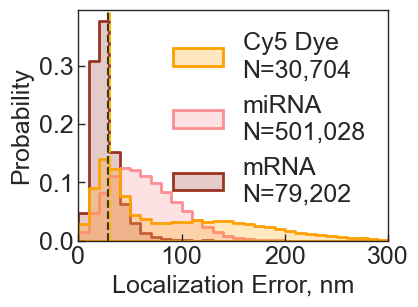

In [49]:
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["linear_fit_R2"] > 0.7]
# quantile = np.quantile(df_AIO["linear_fit_sigma"].dropna().to_numpy(), 0.999)
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=data,
    x="linear_fit_sigma",
    hue="label",
    palette=palette,
    bins=30,
    binrange=(0, 300),
    stat="probability",
    common_norm=False,
    lw=2,
    element="step",
)
plt.axvline(immobile_stepsize_threshold_nm - 0.97, ls="--", color="#333232")
plt.axvline(immobile_stepsize_threshold_nm + 0.97, ls="--", color="#f7b801")
plt.xlim(0, 300)
sns.move_legend(ax, 0, title=None, frameon=False, fontsize=18)
plt.xlabel("Localization Error, nm", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("1.LocError_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

### Mean Step Size (whether static molecule)

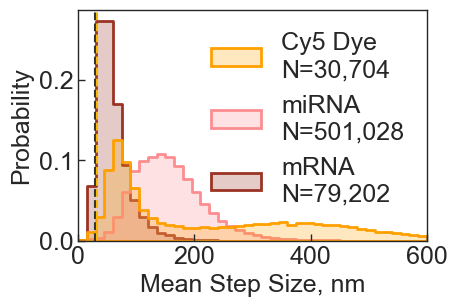

In [43]:
plt.figure(figsize=(4.5, 3))
ax = sns.histplot(
    data=df_AIO,
    x="mean_stepsize_nm",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, 600),
    lw=2,
    element='step',
)
plt.xlim(0, 600)
sns.move_legend(ax, 0, title=None, frameon=False, fontsize=18)
plt.axvline(immobile_stepsize_threshold_nm - 1.6, ls="--", color="#333232")
plt.axvline(immobile_stepsize_threshold_nm + 1.6, ls="--", color="#f7b801")
plt.xlabel("Mean Step Size, nm", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("2.mean_stepsize_nm_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)


### alpha distribution

Cy5 Dye
N=30,704 21597
miRNA
N=501,028 369232
mRNA
N=79,202 25888


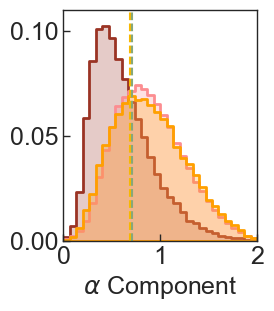

In [44]:
plt.figure(figsize=(2.5, 3))
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["loglog_fit_R2"] > 0.7]
data = data[data["alpha"] > 0]
ax = sns.histplot(
    data=data,
    x="alpha",
    hue="label",
    palette=palette,
    bins=30,
    stat="probability",
    common_norm=False,
    binrange=(0, 2),
    lw=2,
    element='step',
    legend=False,
)
# sns.move_legend(ax, 0, title=None, frameon=False, fontsize=18)
plt.axvline(threshold_alpha - 0.011, ls="--", color="#f7b801")
plt.axvline(threshold_alpha + 0.011, ls="--", color="#87a878")
plt.xlim(0, 2)
plt.ylim(0, 0.11)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("")
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("3.alpha_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])

### Angle Distribution

In [46]:
lst_angle = []
lst_label = []
for _, row in df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    lst_label.extend(labels)

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        "label": lst_label,
    },
    dtype=object,
)

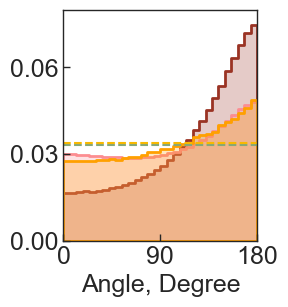

In [47]:
plt.figure(figsize=(2.5, 3))
bins = 30
sns.histplot(
    data=data,
    x="angle",
    hue="label",
    palette=palette,
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    legend=False,
)
plt.axhline(1 / bins - 0.0004, color="#87a878", ls="--")
plt.axhline(1 / bins + 0.0004, color="#f7b801", ls="--")
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.08)
plt.yticks([0, 0.03, 0.06])
plt.xlabel("Angle, Degree", fontsize=18)
plt.ylabel("")
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("4.angle_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)


### D distribution among the non contrained molecules

In [ ]:
data = df_AIO[df_AIO["linear_fit_R2"] > 0.7]
data = data[data["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
data = data[data["alpha"] > 0.5]
plt.figure(figsize=(3, 2))
ax = sns.histplot(
    data=data,
    x="linear_fit_log10D",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(-3, 2.5),
    alpha=0.7,
    legend=False,
    element="step",
)
# sns.move_legend(ax, 1, title=None, frameon=False, fontsize=18)
plt.xlim(-3, 2.5)
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig(
    "5.ApparentD_linear_histo_" + postfix, format="png", bbox_inches="tight", dpi=300
)

print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])
print(label_3, data[data["label"] == label_3].shape[0])

### Plot saSPT

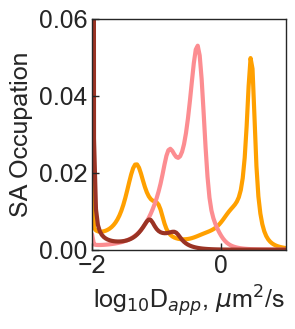

In [48]:
plt.figure(figsize=(2.5, 3))
ax = sns.lineplot(
    data=df_saspt,
    x="log10D",
    y="Probability",
    hue="label",
    palette=palette,
    lw=3,
    legend=False,
)
log10D = df_saspt["log10D"].to_numpy(dtype=float)
plt.xlim(-2, 1)
plt.ylim(0, 0.06)
plt.xlabel(r"log$_{10}$D$_{app}$, $\mu$m$^2$/s", fontsize=18)
plt.ylabel("SA Occupation", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("6.saspt_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)


### Stacked bar plot of fractions

#### Calculations

In [50]:
# Output file structure
labels = [label_1, label_2, label_3]
columns = [
    "label",
    "replicate_prefix",
    "N, Total",
    "N, Mobile",
    "N, Constrained",
    "Static Fraction",
    "Constrained Fraction",
]

In [51]:
lst_rows_of_df = []
fnames = [fname_AIO_1, fname_AIO_2, fname_AIO_3]

for i in range(3):
    df_current = pd.read_csv(fnames[i])
    df_current = df_current.astype(
        {"linear_fit_log10D": float, "mean_stepsize_nm": float, "alpha": float}
    )
    # all filenames within the current condition/file
    all_filenames = df_current["filename"].unique().tolist()
    # filename prefix for each replicate
    replicate_prefixs = np.unique([f.split("FOV")[0] for f in all_filenames])

    for prefix in replicate_prefixs:
        current_replicate_filenames = [f for f in all_filenames if prefix in f]
        df_current_replicate = df_current[
            df_current["filename"].isin(current_replicate_filenames)
        ]

        # Judege if immobile by mean step size
        df_mobile = df_current_replicate[
            df_current_replicate["mean_stepsize_nm"] >= immobile_stepsize_threshold_nm
        ]

        # Judge if constrained by alpha component
        df_constrained = df_mobile[df_mobile["alpha"] <= threshold_alpha]

        N_total = df_current_replicate.shape[0]
        N_mobile = df_mobile.shape[0]
        N_constrained = df_constrained.shape[0]

        if N_constrained < 1:
            continue

        F_immobile = (N_total - N_mobile) / N_total
        F_constrained = N_constrained / N_mobile

        # save
        lst_rows_of_df.append(
            [
                labels[i],
                prefix,
                N_total,
                N_mobile,
                N_constrained,
                F_immobile,
                F_constrained,
            ]
        )

data = pd.DataFrame.from_records(
    lst_rows_of_df,
    columns=columns,
)

In [52]:
N_total = data["N, Total"].to_numpy(int)
N_mobile = data["N, Mobile"].to_numpy(int)
N_immobile = N_total - N_mobile
N_constrained = data["N, Constrained"].to_numpy(int)
N_normal = N_mobile - N_constrained

frac_immobile = N_immobile / N_total
frac_constrained = N_constrained / N_total
frac_normal = N_normal / N_total

data["Immobile"] = frac_immobile
data["Constrained"] = frac_constrained
data["Normal"] = frac_normal

df_mean_error = pd.DataFrame(
    {
        "label": data["label"].unique(),
        "F_immobile_mean": [
            data[data["label"] == label]["Immobile"].mean()
            for label in data["label"].unique()
        ],
        "F_immobile_sem": [
            data[data["label"] == label]["Immobile"].sem()
            for label in data["label"].unique()
        ],
        "F_constrained_mean": [
            data[data["label"] == label]["Constrained"].mean()
            for label in data["label"].unique()
        ],
        "F_constrained_sem": [
            data[data["label"] == label]["Constrained"].sem()
            for label in data["label"].unique()
        ],
        "F_normal_mean": [
            data[data["label"] == label]["Normal"].mean()
            for label in data["label"].unique()
        ],
        "F_normal_sem": [
            data[data["label"] == label]["Normal"].sem()
            for label in data["label"].unique()
        ],
    },
    dtype=object,
)

#### Plot

F_immobile_mean :
label: ['Cy5 Dye\nN=30,704', 'miRNA\nN=501,028', 'mRNA\nN=79,202']
fraction: [1.7808064358541664 0.32330786323562016 5.915485843866704]
SEM: [0.5239075683445807 0.07960530227601892 1.4278867165434412]

F_constrained_mean :
label: ['Cy5 Dye\nN=30,704', 'miRNA\nN=501,028', 'mRNA\nN=79,202']
fraction: [53.21726880493818 45.98954595608823 83.47765527821699]
SEM: [1.2289173303141752 2.4565596365963867 1.937139376300244]

F_normal_mean :
label: ['Cy5 Dye\nN=30,704', 'miRNA\nN=501,028', 'mRNA\nN=79,202']
fraction: [45.00192475920765 53.68714618067615 10.606858877916315]
SEM: [1.3449591863023902 2.4023639070548817 1.7231340805230164]



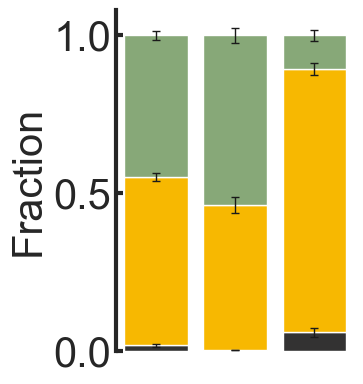

In [57]:
fig = plt.figure(figsize=(3.8, 4))
x = [1, 2, 3]
colors = [
    "#333232",
    "#f7b801",
    "#87a878",
]

df_fractions = df_mean_error[df_mean_error["label"].isin(labels)]
bottom = np.zeros(len(x))
categories = ["F_immobile_mean", "F_constrained_mean", "F_normal_mean"]
for i in range(len(categories)):
    plt.bar(
        x=x,
        height=df_fractions[categories[i]],
        yerr=df_fractions[categories[i][:-4] + "sem"],
        error_kw={"elinewidth": 1},
        capsize=3,
        label=labels,
        bottom=bottom,
        color=colors[i],
    )
    print(categories[i], ":")
    print("label:", labels)
    print("fraction:", df_fractions[categories[i]].to_numpy() * 100)
    print("SEM:", df_fractions[categories[i][:-4] + "sem"].to_numpy() * 100)
    print()
    bottom += df_fractions[categories[i]]
plt.ylim(0, 1.08)
plt.ylabel("Fraction", size=30)
plt.xticks([])
plt.yticks([0, 0.5, 1])
plt.gca().spines[:].set_linewidth(3)
plt.gca().spines[["right", "top", "bottom"]].set_visible(False)
plt.gca().tick_params(
    axis="y",
    which="major",
    labelsize=30,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=3,
)
canvas_width = 0.5
plt.xlim(1 - canvas_width, 3 + canvas_width)
plt.xlabel("")
plt.tight_layout()
plt.savefig(
    "Fracs_compare_left_Cy5_mid_miR_right_mRNA_same20ms.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

### Fitting R2 of all mobile molecules

In [ ]:
data = df_AIO[df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm]
plt.figure(figsize=(3, 2))
ax = sns.histplot(
    data=data,
    x="linear_fit_R2",
    hue="label",
    palette=palette,
    bins=40,
    stat="probability",
    common_norm=False,
    binrange=(0, 1),
    legend=False,
)
# sns.move_legend(ax, 0, title=None, frameon=False, fontsize=18)
plt.xlim(0, 1)
plt.xlabel(r"Fitting R$^2$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("SM1.fitting_R2_histo_" + postfix, format="png", bbox_inches="tight", dpi=300)

print(label_1, data[data["label"] == label_1].shape[0])
print(label_2, data[data["label"] == label_2].shape[0])